# Data loading

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california_dataset = fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(california_dataset.data, california_dataset.target, test_size=0.2, random_state=42)

# Linear regression with MLE
## Model training

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch
from linear_regression import LinearRegressionMAP

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

alpha = 100000
model = LinearRegressionMAP(torch.Tensor(x_train), torch.Tensor(y_train), alpha, device)
model.train()

predicted_train = model.predict(torch.Tensor(x_train)).cpu().detach()
print("MSE - Train: ", torch.mean(torch.square(torch.Tensor(y_train) - predicted_train)).item())

predicted_test = model.predict(torch.Tensor(x_test)).cpu().detach()
print("MSE - Test: ", torch.mean(torch.square(torch.Tensor(y_test) - predicted_test)).item())

print("Weights: ", model.weights.cpu().numpy())
print("Bias: ", model.bias.cpu().numpy())

MSE - Train:  1.4565479755401611
MSE - Test:  1.4307565689086914
Weights:  [[ 1.5577269e-01]
 [ 1.2762314e-02]
 [ 2.4280282e-02]
 [-4.5123370e-03]
 [ 1.5370875e-05]
 [-2.9102636e-03]
 [-3.7413914e-02]
 [-1.9200975e-02]]
Bias:  -0.00015663616


## Model visualization

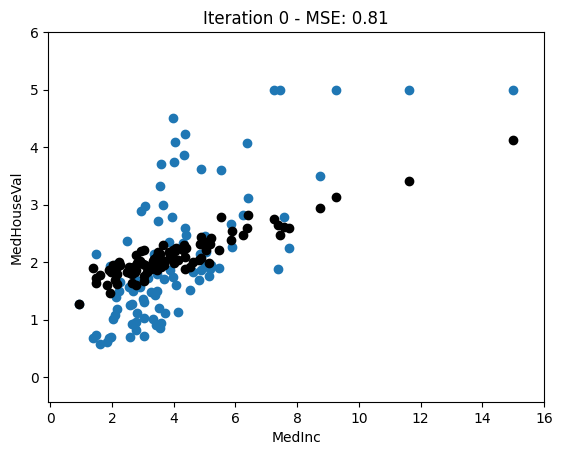

In [19]:
# Plot the results
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt

def plot_predictions(iteration_index, random_indices, var_index, x_test, y_test, weights, bias) -> None:
    x_test = x_test[random_indices]
    y_test = y_test[random_indices]
    y_predicted = (torch.matmul(x_test, weights) + bias).flatten()

    # For plotting
    x_min = x_test[:,var_index].min() - 1
    x_max = x_test[:,var_index].max() + 1
    y_min = y_test.min() - 1
    y_max = y_test.max() + 1

    # Calculate the MSE
    mse = torch.mean(torch.square(y_test - y_predicted))

    # Clean everything
    plt.clf()
    plt.xlabel(california_dataset.feature_names[var_index])
    plt.ylabel(california_dataset.target_names[0])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.scatter(x_test[:,var_index].cpu().numpy(), y_test.cpu().numpy()) # Plot test data
    plt.scatter(x_test[:,var_index].cpu().numpy(), y_predicted.cpu().numpy(), color="k") # Plot predictions
    plt.title(f"Iteration {iteration_index} - MSE: {mse:.2f}")

# Data to plot
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

num_points_to_display = 100
variable_index = 0

weights = model.weights.cpu().detach()
bias = model.bias.cpu().detach()

np.random.seed(42)

# Select random indices to display over time
random_indices = np.random.choice(x_test.shape[0], num_points_to_display)

plot_predictions(0, random_indices, variable_index, x_test, y_test, weights, bias)
plt.show()